## 02 knn 알고리즘 시각화

In [0]:
#! pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=1a63bc6651a1bd1811e75ec54cd6ffc66d118cad7bbf62f97ee3dfa26fcf81d0
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import mglearn
import matplotlib.pyplot as plt

%matplotlib inline

### knn의 k가 1인 경우의 알고리즘 (회귀-수치형 값의 예측)

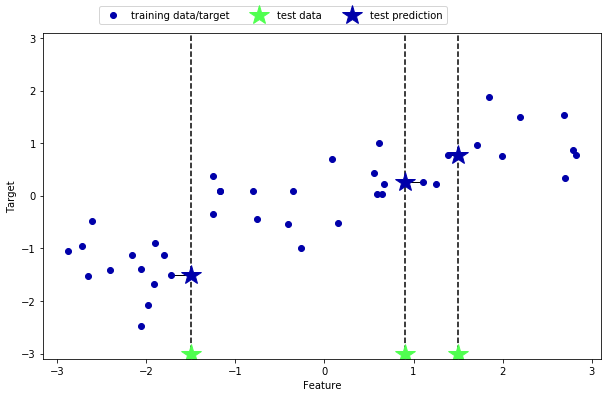

In [0]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

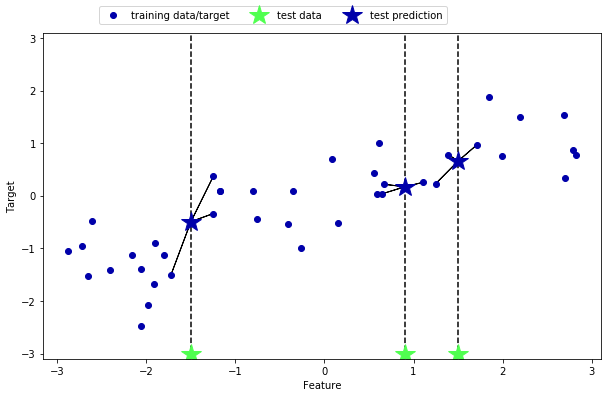

In [0]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

### knn의 k가 3인 경우의 알고리즘 (분류- 범주형 값의 예측)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


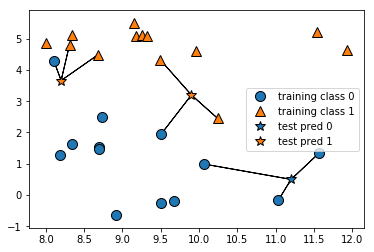

In [0]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


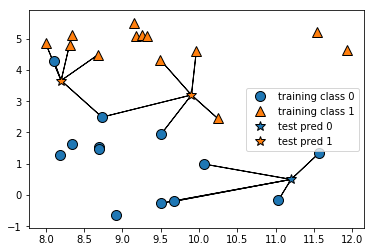

In [0]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

## 03 유방암 데이터 셋 실습

In [0]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [0]:
cancer = load_breast_cancer()

print(cancer.keys())
print(cancer.items())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
dict_items([('data', array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])), ('target', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 

### 데이터 셋 나누기

In [0]:
from sklearn.model_selection import train_test_split

X = cancer.data
Y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    stratify = cancer.target,
                                                    random_state=77)

### 머신러닝 모델 만들기 / 예측하기
(1) 모델 만들기

(2) 모델 학습시키기 model.fit()

(3) 모델 예측 model.predict()

In [0]:
from sklearn.neighbors import KNeighborsClassifier

#(1)
model = KNeighborsClassifier(n_neighbors=3)
#(2)
model.fit(X_train, y_train)
#(3)
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

### 정확도 확인

In [0]:
(pred == y_test).sum()/(len(pred))

0.9090909090909091

In [0]:
acc_tr = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("훈련 데이터 셋의 정확도 : {:2f}" .format(acc_tr))
print("테스트 데이터 셋의 정확도 : {:2f}" .format(acc_test))

훈련 데이터 셋의 정확도 : 0.955399
테스트 데이터 셋의 정확도 : 0.909091


In [0]:
training_accuracy = []
test_accuracy = []
k_num = range(1,11)

for n in k_num:
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X_train, y_train)
  
  acc_tr = model.score(X_train, y_train)
  acc_test = model.score(X_test, y_test)

  training_accuracy.append(acc_tr)
  test_accuracy.append(acc_test)

  print("k : {}, tr_acc : {:.2f}, test_acc : {:.2f}" 
        .format(n, acc_tr, acc_test))

k : 1, tr_acc : 1.00, test_acc : 0.89
k : 2, tr_acc : 0.97, test_acc : 0.90
k : 3, tr_acc : 0.96, test_acc : 0.91
k : 4, tr_acc : 0.95, test_acc : 0.90
k : 5, tr_acc : 0.95, test_acc : 0.92
k : 6, tr_acc : 0.96, test_acc : 0.90
k : 7, tr_acc : 0.95, test_acc : 0.91
k : 8, tr_acc : 0.95, test_acc : 0.91
k : 9, tr_acc : 0.95, test_acc : 0.91
k : 10, tr_acc : 0.94, test_acc : 0.91
